<a href="https://colab.research.google.com/github/IamArmanNikkhah/DataMining-Absenteeism_at_Work/blob/main/DataMining_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
import math

**Cloning required files**

In [ ]:
!git clone https://github.com/IamArmanNikkhah/DataMining-Preprocess-Absenteeism_at_Work.git

fatal: destination path 'DataMining-Preprocess-Absenteeism_at_Work' already exists and is not an empty directory.


**Load CSV file**

In [ ]:
df = pd.read_csv('/content/DataMining-Preprocess-Absenteeism_at_Work/Absenteeism_at_work.csv')

# Data Pre-processing

**Finding empty cells  in each row**

In [ ]:
def empty_cells(df):
    """
    Returns a list of columns with empty cells and the number of them
    """
    empty_cells = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            empty_cells.append((col, df[col].isnull().sum()))
    return empty_cells

empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 7),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 3),
 ('Work load Average/day', 10),
 ('Hit target', 6),
 ('Disciplinary failure', 6),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 4),
 ('Pet', 2),
 ('Weight', 1),
 ('Height', 14),
 ('Body mass index', 31),
 ('Absenteeism time in hours', 22)]

**Remove rows that have empty cells in "Absenteeism time in hours" column**

In [ ]:
def drop_empty_rows(df, column):
    return df.dropna(subset=[column])
df = drop_empty_rows(df, 'Absenteeism time in hours')

**Calculating null BMI values (if applicable)**


In [ ]:
# find empty cells in the BMI column
empty_cell = df['Body mass index'].isnull()

# calculate BMI according to Weight and Height columns if applicable
df.loc[empty_cell, 'Body mass index'] = df.loc[empty_cell, 'Weight'] / (df.loc[empty_cell, 'Height']/100)**2

# check if there are still empty cells in the BMI column
df['Body mass index'].isnull().sum()


2

In [ ]:
df[df['Body mass index'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,"294,217",...,0.0,1.0,2.0,1.0,NaN,1.0,90.0,NaN,NaN,24.0
273,5,0.0,9.0,5,1,235.0,20.0,13.0,43.0,"294,217",...,1.0,1.0,1.0,1.0,0.0,0.0,106.0,NaN,NaN,0.0


**Delete rows that their BMI can't be calculated**


In [ ]:
df = df.dropna(subset=['Body mass index'])

**Finding a list of columns that are highly correlated to each other.**

In [ ]:
def highly_correlated(df, threshold=0.8):
    """
    Returns a list of columns that are highly correlated to each other.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

highly_correlated(df, 0.8)

['Body mass index']

According to the correlation matrix Weight and BMI are highly coorelated so we can ommit Weight column

In [ ]:
df.drop('Weight', axis=1, inplace=True)

**converting 'Work load Average/day' data cells from string to integer**

In [ ]:
def convert_to_int(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: float(str(x).replace(',', '')))
    return df
df = convert_to_int(df, 'Work load Average/day')

**Filling empty cells in "Transportation expense" , "Distance from Residence to Work", "Service time", "Age", "Work load Average/day", "HIT target", "Son", "Pet" , "Weight" with mean**

In [ ]:
empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 6),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 2),
 ('Work load Average/day', 8),
 ('Hit target', 6),
 ('Disciplinary failure', 5),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 3),
 ('Pet', 2),
 ('Height', 12)]

In [ ]:
def fillna_mean(df, column_name):
    """
    Get a column from a dataframe and fill empty rows with the average of that column
    """
    column = df[column_name]
    df[column_name] = column.fillna(column.mean())
    return df

def fill_null_with_normal_distribution(df, column_name):
    """
    Fill null cells in a column with normal distribution
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    null_count = df[column_name].isnull().sum()
    random_list = np.random.randn(null_count)
    random_list = random_list * std + mean
    random_list = random_list.round().astype(int)
    df.loc[df[column_name].isnull(), column_name] = random_list
    return df

df = fill_null_with_normal_distribution(df, 'Reason for absence')
df = fill_null_with_normal_distribution(df, 'Month of absence')
df = fill_null_with_normal_distribution(df, 'Transportation expense')
df = fill_null_with_normal_distribution(df, 'Distance from Residence to Work')
df = fill_null_with_normal_distribution(df, 'Service time')
df = fill_null_with_normal_distribution(df, 'Age')
df = fillna_mean(df, 'Work load Average/day')
df = fill_null_with_normal_distribution(df, 'Hit target')
df = fill_null_with_normal_distribution(df, 'Disciplinary failure')
df = fill_null_with_normal_distribution(df, 'Education')
df = fill_null_with_normal_distribution(df, 'Son')
df = fill_null_with_normal_distribution(df, 'Social drinker')
df = fill_null_with_normal_distribution(df, 'Social smoker')
df = fill_null_with_normal_distribution(df, 'Pet')
df = fill_null_with_normal_distribution(df, 'Height')

**Finding outliners and noises in data and removing them**

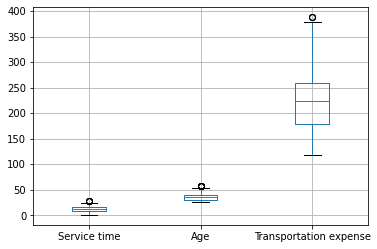

In [ ]:
# BEFORE REMOVING OUTLIERS
df.boxplot(column=['Service time', 'Age'])
plt.show()

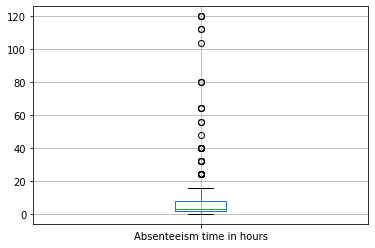

In [ ]:
# BEFORE REMOVING OUTLIERS
df.boxplot(column=['Absenteeism time in hours'])
plt.show()

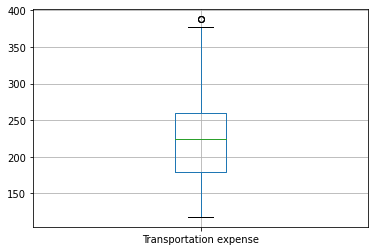

In [ ]:
# BEFORE REMOVING OUTLIERS
df.boxplot(column=['Transportation expense'])
plt.show()

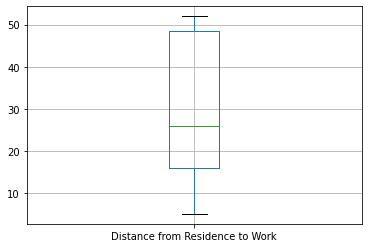

In [ ]:
# BEFORE REMOVING OUTLIERS
df.boxplot(column=['Distance from Residence to Work'])
plt.show()

In [ ]:
def find_outliners(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

Absenteeism_outliners   = find_outliners(df, 'Absenteeism time in hours')
df.drop(Absenteeism_outliners.index.tolist(),  inplace=True)

load_outliners          = find_outliners(df, 'Work load Average/day')
df.drop(load_outliners.index.tolist(),         inplace=True)

Service_outliners       = find_outliners(df, 'Service time')
df.drop(Service_outliners.index.tolist(),      inplace=True)

Age_outliners           = find_outliners(df, 'Age')
df.drop(Age_outliners.index.tolist(),          inplace=True)

Transportation_outliners= find_outliners(df, 'Transportation expense')
df.drop(Transportation_outliners.index.tolist(),  inplace=True)

Distance_outliners= find_outliners(df, 'Distance from Residence to Work')
df.drop(Distance_outliners.index.tolist(),  inplace=True)

Hit_outliners= find_outliners(df, 'Hit target')
df.drop(Hit_outliners.index.tolist(),  inplace=True)

Son_outliners= find_outliners(df, 'Son')
df.drop(Son_outliners.index.tolist(),  inplace=True)

Height_outliners= find_outliners(df, 'Height')
df.drop(Height_outliners.index.tolist(),  inplace=True)

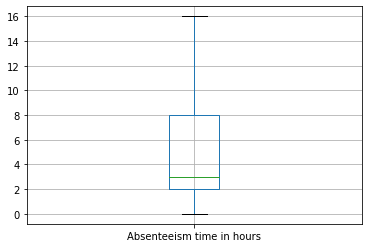

In [ ]:
# AFTER REMOVING OUTLIERS

df.boxplot(column=['Absenteeism time in hours'])
plt.show()

**Removing least coorelated columns with the 'Absenteeism time in hours' column**

In [ ]:
def least_correlated(df, col):
    corr_matrix = df.corr().abs()
    corr_col = corr_matrix[col].sort_values(ascending=True)
    return corr_col[:5]

least_correlated(df, 'Absenteeism time in hours')

Distance from Residence to Work    0.000783
Service time                       0.001475
Month of absence                   0.001869
Pet                                0.002356
Education                          0.005785
Name: Absenteeism time in hours, dtype: float64

'Month of absence' and 'Pet' , 'Hit target' and 'Education' columns have really low coorelation with the target, so we can remove them

In [ ]:
df.drop('Month of absence', axis=1, inplace=True)
df.drop('Pet', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)
df.drop('Service time', axis=1, inplace=True)

**Spliting Dataset into Training set ( = X) and Test set ( = Y)**

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

**Normalizing numerical columns**

In [ ]:
def normalize_columns(df, columns):
    """
    Normalize specific columns in a dataframe
    """
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

X = normalize_columns(X, ["Transportation expense", "Distance from Residence to Work", "Age", "Work load Average/day", "Son", "Height", "Body mass index"])

**discretizing Data in Y into 10 categories**

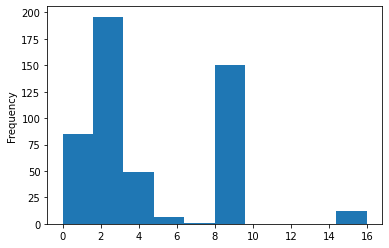

In [ ]:
df['Absenteeism time in hours'].plot(kind='hist')

# Display the plot
plt.show()

In [ ]:
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply(lambda x: 0 if x <=6.5  else x)
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply(lambda x: 1 if 6.5 < x <=10  else x)
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply(lambda x: 2 if x > 10  else x)

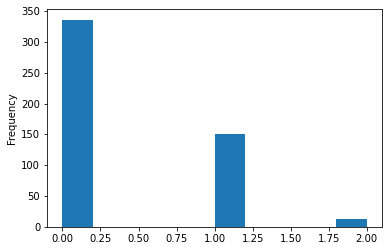

In [ ]:
df['Absenteeism time in hours'].plot(kind='hist')

# Display the plot
plt.show()

**split dataframe into train set and test set randomly**

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return train_indices, test_indices

train_indices , test_indices = split_train_test(df, 0.2)

X_train                      = X.iloc[train_indices]
Y_train                      = Y.iloc[train_indices]

X_test                       = X.iloc[test_indices]
Y_test                       = Y.iloc[test_indices]

df_train                     = df.iloc[train_indices]
df_test                      = df.iloc[test_indices]

# Implementing K-NN alghorithm

**1 - The first step is to calculate the distance between two rows in a dataset.**

In [ ]:
"""
Euclidean distance between two vectors
"""

def euclidean_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.sqrt(np.sum((x - y) ** 2))

"""
Manhattan distance between two vectors
"""
def manhattan_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.sum(np.abs(x - y))

"""
Chebyshev distance between two vectors
"""
def chebyshev_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.max(np.abs(x - y))

"""
Minkowski distance between two vectors
"""
def minkowski_distance(x, y, p=3):
    x , y  = np.array(x), np.array(y)
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

**2 - Get Nearest Neighbors**

In [ ]:
def df_to_list(df):
    """
    Convert a dataframe to a list
    """
    return df.values.tolist()

In [ ]:
def get_neighbors(train, test_row, num_neighbors, distance_function):
    distances = list()
    row_indx  = 0
    train, test_row  = df_to_list(train), df_to_list(test_row)
    for train_row in train:
        dist = distance_function(test_row, train_row)
        distances.append((train_row, row_indx , dist))
        row_indx += 1
    distances.sort(key=lambda tup: tup[2])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append((distances[i][0], distances[i][1]))
    return neighbors

**3 - Make Predictions**

In [ ]:
def predict_classification(X, Y , X_row, num_neighbors, distance_function):
    Y             = df_to_list(Y)
    neighbors     = get_neighbors(X, X_row, num_neighbors, distance_function)
    output_values = [Y[row[1]] for row in neighbors]
    prediction    = max(set(output_values), key=output_values.count)
    return prediction

In [ ]:
def k_nearest_neighbors(X, Y, X_test, num_neighbors, distance_function=euclidean_distance):
	predictions = list()
	#X_test = df_to_list(X_test)
	for indx in range(len(X_test.index)):
		row = X_test.iloc[indx]
		output = predict_classification(X, Y, row, num_neighbors, distance_function)
		predictions.append(output)
	
  
	return(predictions)

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
predicted = k_nearest_neighbors(X_train, Y_train, X_test, 27)
actual    = Y_test.values.tolist()
accuracy_metric(actual, predicted)

77.77777777777779

**Finding the optimal value of K**

In [ ]:
def accuracy_respect_K(k):
  predicted = k_nearest_neighbors(X_train, Y_train, X_test, k)
  actual    = Y_test.values.tolist()
  return accuracy_metric(actual, predicted)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(f, xmin, xmax):
    """
    Plot a function f(x) from xmin to xmax with npoints points
    """
    x = np.arange(xmin, xmax + 1)
    y = [f(xi) for xi in x]
    plt.plot(x, y)
    plt.show()

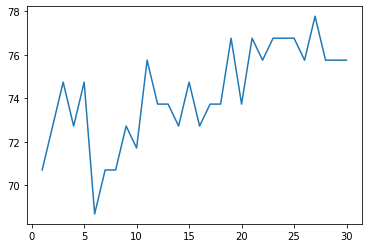

In [ ]:
plot_function(accuracy_respect_K, 1, 30)

**Classification using scikit-learn KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,30)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred))
result = metrics.confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[61  6  0]
 [16 14  0]
 [ 1  1  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        67
         1.0       0.67      0.47      0.55        30
         2.0       0.00      0.00      0.00         2

    accuracy                           0.76        99
   macro avg       0.48      0.46      0.46        99
weighted avg       0.73      0.76      0.74        99



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation

Calculating precision, recall and confusion_matrix

In [ ]:
def precision(y_true, y_pred, cat):
    """
    Calculate precision of a classification
    """
    y_true , y_pred   =  np.array(y_true), np.array(y_pred)
    # calculate true positives
    tp = sum((y_true == cat) & (y_pred == cat))
    # calculate false positives
    fp = sum((y_true != cat) & (y_pred == cat))
    # calculate precision
    precision = tp / (tp + fp)
    return precision

def recall(y_true, y_pred, cat):
    """
    Calculate recall of a classification
    """
    y_true , y_pred   =  np.array(y_true), np.array(y_pred)
    # calculate true positives
    tp = sum((y_true == cat) & (y_pred == cat))
    # calculate false negatives
    fn = sum((y_true == cat) & (y_pred != cat))
    # calculate recall
    recall = tp / (tp + fn)
    return recall

def confusion_matrix(y_true, y_pred, cat ):
    """
    Calculate confusion matrix of a classification
    """
    y_true , y_pred   =  np.array(y_true), np.array(y_pred)
    # calculate true positives
    tp = sum((y_true == cat) & (y_pred == cat))
    # calculate false positives
    fp = sum((y_true != cat) & (y_pred == cat))
    # calculate false negatives
    fn = sum((y_true == cat) & (y_pred != cat))
    # calculate true negatives
    tn = sum((y_true != cat) & (y_pred != cat))
    # calculate confusion matrix
    confusion_matrix = np.array([[tp, fp], [fn, tn]])
    return confusion_matrix

In [ ]:
confusion_matrix(actual, predicted, 0)

array([[63, 17],
       [ 4, 15]])

In [ ]:
category_list = [0,1,2]
for category in category_list:
  perc    = precision(actual, predicted, category)
  perc = "{:.2f}".format(perc)
  rec     = recall(actual, predicted, category)
  rec = "{:.2f}".format(rec)
  print(f"Caregory Name : {category}    Precision : {perc}%    Recall: {rec}% \n")

Caregory Name : 0    Precision : 0.79%    Recall: 0.94% 

Caregory Name : 1    Precision : 0.74%    Recall: 0.47% 

Caregory Name : 2    Precision : nan%    Recall: 0.00% 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(actual, predicted)

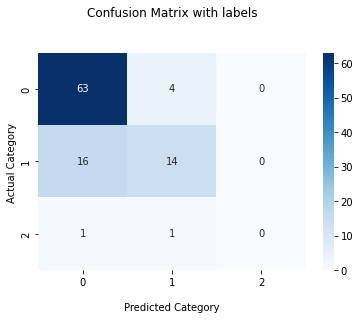

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

plt.show()

# PCA

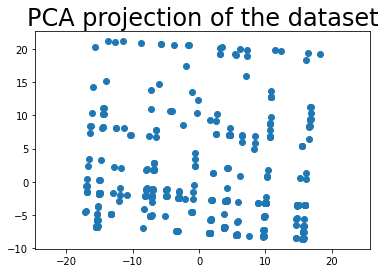

In [ ]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(df)
    pca_df = pd.DataFrame(pca.transform(df))
    return pca_df

pf = apply_pca(X_train, 2)
plt.scatter(pf[0], pf[1],cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the dataset', fontsize=24);

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


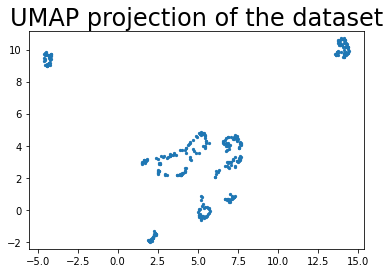

In [ ]:
import umap
def umap_visualize(df, n_neighbors=15, min_dist=0.1, n_components=8, metric='euclidean'):
    """
    Apply UMAP on a dataframe and visualize the result
    """
    # Apply UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors,
                        min_dist=min_dist,
                        n_components=n_components,
                        metric=metric)
    embedding = reducer.fit_transform(df)
    
    # Visualize the result
    plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the dataset', fontsize=24);
    
    return embedding

# Apply UMAP on the dataframe
embedding = umap_visualize(X_train)

**Applying K-NN alghorithm after PCA transformation**

In [ ]:
X_PCA   = apply_pca(X, 5)
train_indices , test_indices = split_train_test(X_PCA, 0.2)

X_train_PCA                      = X_PCA.iloc[train_indices]
X_test_PCA                       = X_PCA.iloc[test_indices]

In [ ]:
predicted_PCA = k_nearest_neighbors(X_train_PCA, Y_train, X_test_PCA, 27)
actual_PCA    = Y_test.values.tolist()
accuracy_metric(actual_PCA, predicted_PCA)

67.67676767676768

In [ ]:
def accuracy_respect_K_PCA(k):
  predicted = k_nearest_neighbors(X_train_PCA, Y_train, X_test_PCA, k)
  actual    = Y_test.values.tolist()
  return accuracy_metric(actual, predicted)

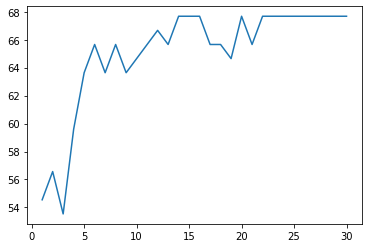

In [ ]:
plot_function(accuracy_respect_K_PCA, 1, 30)

**Finding the optimal number of feature reduction**

In [ ]:
def accuracy_respect_FeatureN(N):
  X_PCA   = apply_pca(X, N)
  train_indices , test_indices = split_train_test(X_PCA, 0.2)

  X_train_PCA                      = X_PCA.iloc[train_indices]
  X_test_PCA                       = X_PCA.iloc[test_indices]
  predicted_PCA = k_nearest_neighbors(X_train_PCA, Y_train, X_test_PCA, 5)
  actual_PCA    = Y_test.values.tolist()
  return accuracy_metric(actual_PCA, predicted_PCA)

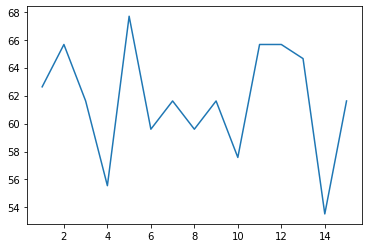

In [ ]:
plot_function(accuracy_respect_FeatureN, 1, 15)

# Comparison

In [ ]:
# K = 27
# PCA_features = 5

category_list = [0,1,2]
for category in category_list:
  perc    = precision(actual_PCA, predicted_PCA, category)
  perc = "{:.2f}".format(perc)
  rec     = recall(actual_PCA, predicted_PCA, category)
  rec = "{:.2f}".format(rec)
  print(f"Caregory Name : {category}    Precision : {perc}%    Recall: {rec}% \n")

Caregory Name : 0    Precision : 0.68%    Recall: 1.00% 

Caregory Name : 1    Precision : nan%    Recall: 0.00% 

Caregory Name : 2    Precision : nan%    Recall: 0.00% 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# K = 27

category_list = [0,1,2]
for category in category_list:
  perc    = precision(actual, predicted, category)
  perc = "{:.2f}".format(perc)
  rec     = recall(actual, predicted, category)
  rec = "{:.2f}".format(rec)
  print(f"Caregory Name : {category}    Precision : {perc}%    Recall: {rec}% \n")

Caregory Name : 0    Precision : 0.79%    Recall: 0.94% 

Caregory Name : 1    Precision : 0.74%    Recall: 0.47% 

Caregory Name : 2    Precision : nan%    Recall: 0.00% 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
